# Project: Space Weather Startup
## Enock Gansou

### Problem
You've been hired by a new space weather startup looking to disrupt the space weather reporting business. Your first project is to provide better data about the top 50 solar flares recorded so far than that shown by your competitor SpaceWeatherLive.com. To do this, they've pointed you to this messy HTML page from NASA (available here also) where you can get the extra data your startup is going to post in your new spiffy site.

Of course, you don't have access to the raw data for either of these two tables, so as an enterprising data scientist you will scrape this information directly from each HTML page using all the great tools available to you in Python. By the way, you should read up a bit on Solar Flares, coronal mass ejections, the solar flare alphabet soup, the scary storms of Halloween 2003, and sickening solar flares.

In [1]:
import requests 
import locale 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import parser
import html5lib
import re
import matplotlib.pyplot as plt
from datetime import datetime

### Part 1: Data scraping and preparation
### Step 1: Scrape the data
Using requests to get the URL;<br>
Use BeautifulSoup to change it to html; <br>
Since there are only 1 table tag in this html, we use find("table") to get the table HTML we need;<br>
Use pandas to make this table html to a dataframe; <br>
Rename the columns and index; <br>
Get the actual regions using soup <br>
Print out the dataframe: the 50 flares by spaceweatherlive

In [2]:
r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

In [3]:
txt = r.text

In [4]:
soup = BeautifulSoup(txt, 'lxml')
ptf = soup.prettify()
ptf

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <title>\n   Top 50 solar flares | Solar activity | SpaceWeatherLive.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow" name="robots"/>\n  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>\n  <meta content="SpaceWeatherLive, Real-time, aurora community, solar wind, Kp index, kiruna, EPAM, DSCVR, aurora borealis, aurora, aurora australis, northern lights, data plots, proton flux monitor, solar activity, solar flares, sunspots, aurora alert, warnings, Sun, Space Weather, SDO, Stereo, SpaceWeatherUpdates, SpaceWeatherUpdate, Space Weather update" name="keywords"/>\n  <!-- Facebook meta -->\n  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>\n  <meta content="article" property="og:type"/>\n  <meta content="Top 50 solar flares | Sol

In [5]:
table = soup.find("table")  
table

<table class="table table-striped table-responsive-md"><thead><tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28.0</span></td><td>2003/11/04</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/10486">0486</a></span></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-toggle="lightbox" data-type="video" href="/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="far fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray">View archive</a></div></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20.0</span></td><td>2001/04/02</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/9393">9393</a></span></td><td>21:32</td><td>21:51</td><td>22:03</td><td><div class="b

In [6]:
regions = soup.findAll('a', href=re.compile("activity/region"))
regions = pd.DataFrame(regions, columns = ['raw'])
regions['raw'] = regions['raw'].astype(str)
regions = regions['raw'].str.extract('([0-9]+)',expand = True)
df = pd.read_html(ptf, flavor='html5lib')[0]

In [7]:
df.columns = ["rank","x_class","date","region","start_time","max_time","end_time","movie"]
df['region'] = regions
df.index = range(1, 51)
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,10486,19:29,19:53,20:06,Movie View archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2,2003/10/28,10486,09:51,11:10,11:24,Movie View archive
4,4,X17.0,2005/09/07,10808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,6,X10.0,2003/10/29,10486,20:37,20:49,21:01,Movie View archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,8,X9.3,2017/09/06,12673,11:53,12:02,12:10,Movie View archive
9,9,X9.0,2006/12/05,10930,10:18,10:35,10:45,Movie View archive
10,10,X8.3,2003/11/02,10486,17:03,17:25,17:39,Movie View archive


### Step 2: Tidy the top 50 solar flare data 
Remove the "movie" column by using drop. Iterate each rows to change the time strings into datatime objects; Replace empty cell by "NaN"; Reorder the columns.Drop useless colums <br>
Print out the dataframe: Tidying the top 50 solar flare data

In [8]:
df_new = df.drop('movie', axis = 1)

In [9]:
for i, row in df_new.iterrows():
    df_new.set_value(i,"start_datetime",pd.to_datetime(row["date"]+" "+row["start_time"]))
    df_new.set_value(i,"max_datetime",pd.to_datetime(row["date"]+" "+row["max_time"]))
    df_new.set_value(i,"end_datetime",pd.to_datetime(row["date"]+" "+row["end_time"]))

C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [10]:
df_new = df_new.drop('date', axis = 1)
df_new = df_new.drop('start_time', axis = 1)
df_new = df_new.drop('max_time', axis = 1)
df_new = df_new.drop('end_time', axis = 1)
df_new = df_new[["rank","x_class","start_datetime","max_datetime","end_datetime", "region"]]

In [11]:
df_new = df_new.replace("-","NaN")

In [12]:
df_new

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,10486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,10486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,10808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,10486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,12673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,10930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,10486


### Step 3:  Scrape the NASA data
Using requests to get the URL; Use BeautifulSoup tochange it to html;<br>
Since there are only 1 pre tag in this html, we use find('pre') to get the HTML we need;<br>
Use get_text() to extract the text;<br>
Split the data by the newline character and get the specific lines needed in the list;<br>
Put the data into a data frame and split the data by the whitespace while expanding it;<br>
Print the data frame : Scraping the NASA data <br>

In [13]:
result2 = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
soup2 = BeautifulSoup(result2.text, 'lxml')
data = soup2.find("pre").get_text()
data = data.split('\n')
data = (data[12:])
data = (data[:-3])

In [14]:
df2 = pd.DataFrame(data, columns = ['raw'])
df2 = df2['raw'].str.split(expand = True)
df2_new = df2[df2.columns[:14]]
df2_new.index = range(1, 512)
df2_new = df2_new.rename(index=str, columns={0: "start_date", 1:"start_time", 2:"end_date", 3:"end_time", 4:"start_frequency", 
                               5:"end_frequency", 6:"flare_location", 7:"flare_region", 8:"flare_classification", 
                               9:"cme_date", 10:"cme_time", 11:"cme_angle", 12:"cme_width", 13:"cme_speed"})

In [15]:
df2_new

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
6,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
7,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
8,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
9,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
10,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


### Step 4: Tidy the NASA the table
Include the relevant colums and name columns appropriately;<br>
Replace all the missing information by "NaN";<br>
Make is_halo and width_lower_bound columns;<br>
Change columns with time string to datetime objects;<br>
Remove useless columns and re-order the columns of the data frame;<br>
Print the data frame: Tidying the NASA the table

In [16]:
df2 = df2[df2.columns[:15]]
df2 = df2.rename(index=str, columns={0: "start_date", 1:"start_time", 2:"end_date", 3:"end_time", 4:"start_frequency", 
                               5:"end_frequency", 6:"flare_location", 7:"flare_region", 8:"importance", 
                               9:"cme_date", 10:"cme_time", 11:"cpa", 12:"width", 13:"speed", 14: "plot"})

In [17]:
df2 = df2.replace("-----","NaN")
df2 = df2.replace("------", "NaN")
df2 = df2.replace("----", "NaN")
df2 = df2.replace("--:--","NaN")
df2 = df2.replace("--/--", "NaN")
df2 = df2.replace("????", "NaN")
df2 = df2.replace("Back", "NaN")
df2 = df2.replace("BACK", "NaN")
df2 = df2.replace("Back?", "NaN")

In [18]:
df2["is_halo"] = df2['cpa'] == "Halo"
df2 = df2.replace("Halo","NaN")
df2["width_lower_bound"] = df2['width'].str.match('>[0-9]')
df2['width'] = df2['width'].str.replace('>', '')

In [19]:
df2['start_time'] = df2['start_time'].str.replace('24:', '00:')
df2['end_time'] = df2['end_time'].str.replace('24:', '00:')
df2['cme_time'] = df2['cme_time'].str.replace('24:', '00:')

In [20]:
for i, row in df2.iterrows():
    df2.set_value(i,"start_datetime",pd.to_datetime(row["start_date"]+" "+row["start_time"]))
    end = str(row["start_date"].split('/')[0] +"/"+ row["end_date"]+" "+row["end_time"])
    df2.set_value(i,"end_datetime",pd.to_datetime(end))
    cme = str(row["start_date"].split('/')[0] +"/"+ str(row["cme_date"])+" "+str(row["cme_time"]))
    df2.set_value(i,"cme_datetime",pd.to_datetime(cme,errors = 'coerce'))

C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Enock Gansou\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [21]:
df2 = df2.drop('start_date', axis = 1)
df2 = df2.drop('start_time', axis = 1)
df2 = df2.drop('end_date', axis = 1)
df2 = df2.drop('end_time', axis = 1)
df2 = df2.drop('cme_time', axis = 1)
df2 = df2.drop('cme_date', axis = 1)
df2 = df2[["start_datetime","end_datetime", "start_frequency", "end_frequency", "flare_location", 
           "flare_region", "importance", "cme_datetime","cpa", "width", "speed", "plot", "is_halo", "width_lower_bound"]]

In [22]:
df2

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


### Part 2: Analysis
### Question 1: Replication
Sort the flare classification the get the "X" flares at the top level. Keep only the "X" flares into the dataframe. Make a column to get the decimal portion from the flare classification. Sort the dataframe according to this column Get the actual top 50 flares from the NASA database and display the result observation: we observe the data is not exactly the same when comparing both databases.  

In [23]:
df2_sort = df2.sort_values(['importance'], ascending=[False])
df2_sort = df2_sort[df2_sort['importance'].str.contains(r'x|X') == True]
df2_sort['num'] = df2_sort['importance'].str.replace('X', '').astype(float)
df2_sort = df2_sort.sort_values(['num'], ascending=[False])
df2_sort = df2_sort.reset_index(drop = True)
df2_sort = df2_sort.drop('num', axis = 1)
df2_sort = df2_sort.drop(df2_sort.index[range(50,89)])
df2_sort

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
2,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
4,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
6,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
7,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False
8,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False
9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False


### Question 2: Integration
Create two dataframes from both databases of the 50 flares having  the flare classification, the start date time, and the flare region. Add to both databases a column having the decimal portion of the flare classification. Now, write a function that matches rows having the same flare region, the same flare classification, and the same start date. This function return a list of indexes of matching rows in the spaceweatherlive databases, "NaN" if no row matches. Put this list into a dataframe and add this as a column ( last column ) to the dataframe of the top 50 solar flares from the NASA database. Print the updated dataframe of the top 50 solar flares from the NASA database

In [24]:
df2_int = df2_sort
df2_int.index = range(1, 52)
df2_int = df2_int.drop('start_frequency', axis = 1)
df2_int = df2_int.drop('cme_datetime', axis = 1)
df2_int = df2_int.drop('end_datetime', axis = 1)
df2_int = df2_int.drop('end_frequency', axis = 1)
df2_int = df2_int.drop('flare_location', axis = 1)
df2_int = df2_int.drop('cpa', axis = 1)
df2_int = df2_int.drop('width', axis = 1)
df2_int = df2_int.drop('speed', axis = 1)
df2_int = df2_int.drop('plot', axis = 1)
df2_int = df2_int.drop('is_halo', axis = 1)
df2_int = df2_int.drop('width_lower_bound', axis = 1)
df2_int = df2_int[["importance","start_datetime", "flare_region"]]
df2_int = df2_int.rename(index=str, columns={"importance":"x_class","start_datetime":"start_datetime", "flare_region":"region"})
df2_int['num'] = df2_int['x_class'].str.replace('X', '').astype(float)

df1_int = df_new.drop('rank', axis = 1)
df1_int = df1_int.drop('max_datetime', axis = 1)
df1_int = df1_int.drop('end_datetime', axis = 1)
df1_int['num'] = df1_int['x_class'].str.replace('X', '').astype(float)

In [25]:
def integration (df1,df2):
    list =[]
    
    for index, row in df2.iterrows(): 
        a = 0
        for i, r in df1.iterrows():
            if (row['num'] == r['num'] and row['region'] == r['region'] and row['start_datetime'].day == r['start_datetime'].day
               and  row['start_datetime'].month == r['start_datetime'].month and row['start_datetime'].year == r['start_datetime'].year):
                list.append(i)
                a = a + 1
        if(a == 0): list.append('NaN')
    return list

In [26]:
positions = pd.DataFrame(integration (df1_int,df2_int), columns = ['raw'])
positions.index = range(1, 52)
df2_sort['position'] = positions
df2_sort

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,position
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,1
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,NaN
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,NaN
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,6
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,7
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,9
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,10
9,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,12
10,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False,13


### Question 3: Analysis
Write a function that compute the number of Halo CMEs in the top 50 flares of the NASA database<br>
Put this number and 50 into different columns of a data frame.<br>
Use this data frame to create a comparison barplot of the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole (50).<br>
The intent of my plot is to determine if flares in the top 50 tend to have Halo CMEs. If the distance between bars are small, the flares in the top 50 tend to have Halo CMEs and vice versa.

In [27]:
def count (df):
    i = 0
    for index, row in df.iterrows(): 
            if (row['is_halo'] == True ):
                i = i + 1
    return i

43


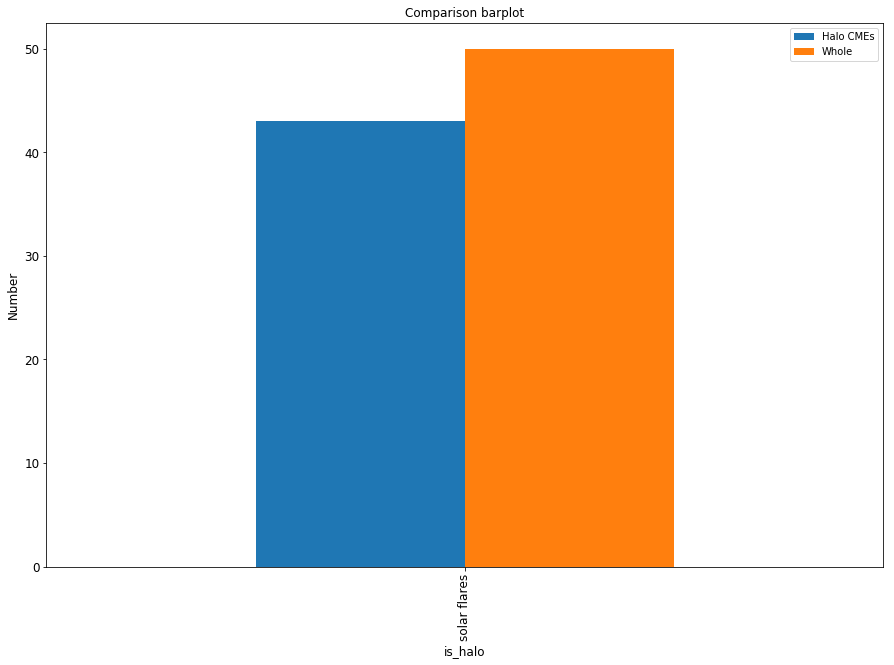

In [28]:
print (count (df2_sort))
d = {'Halo CMEs': count (df2_sort), 'Whole': 50}
df = pd.DataFrame(data = d, index = ['solar flares'])
ax = df[['Halo CMEs','Whole']].plot(kind='bar', title ="Comparison barplot", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("is_halo", fontsize=12)
ax.set_ylabel("Number", fontsize=12)
plt.show()

### Plot description: 
The blue bar represents the number of Halo CMEs in the top 50 flares and the orange bar is the dataset as a whole. On the x - asis, on the left, we have Halo CMEs and on the right, we have the dataset as a whole. On the y - asis, the number representing each condition discussed previously.
### Interpretation: 
We observe that those bars are not very far from one another. Therefore, we can conclude the top 50 flares tend to have Halo CMEs